# DATA WRANGLING WITH NHANES DATASET

* **NAME:** M.Rachel
* **STUDENT NUMBER:** 224234147
* **EMAIL-ID:** rachelriney1608@gmail.com

## INTRODUCTION

The **National Health and Nutrition Examination Survey (NHANES)** is a survey research program conducted by the *National Center for Health Statistics (NCHS)* to assess the health and nutritional status of adults and children in the United States, and to track changes over time. The survey combines interviews, physical examinations and laboratory tests.

**FEATURES:**
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).


In [1]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import spearmanr

# Loading the data with np.genfromtxt and removing the first row as it contains Nan Values 
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",")[1:,:] 
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv",delimiter=",")[1:,:]

In [2]:
# Displaying the first 6 observation of male BMX data
male[:6,:]

array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3],
       [ 99.4, 181.6,  40.4,  39.9,  36. , 120.2, 107. ],
       [ 90.2, 162.5,  38.7,  38. ,  37.3, 110.2, 116.2]])

In [3]:
# Display the 1st 6 observation of female BMX data
female[:6,:]

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2],
       [ 62. , 144.7,  32.5,  34.2,  29.8, 106.7,  84.8]])

In [4]:
male.shape,female.shape

((4081, 7), (4221, 7))

In [5]:
male.dtype, female.dtype

(dtype('float64'), dtype('float64'))

In [6]:
# BMI Calculation for male and female BMI 
male_bmi = male[:, 0] / (male[:, 1] / 100)**2
female_bmi = female[:, 0] / (female[:, 1] / 100)**2

# Add the 8th column as BMI to the matrices
male = np.column_stack((male, male_bmi))
female = np.column_stack((female, female_bmi))


In [7]:
# New shape of data 
male.shape,female.shape

((4081, 8), (4221, 8))

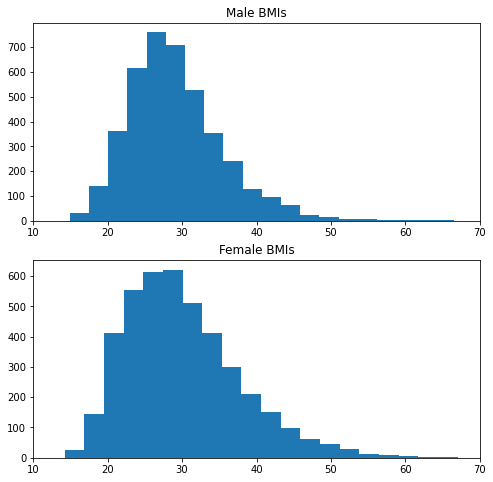

In [8]:
# Creating the subplots for the two histograms of male and female bmx data
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Plot the male BMI histogram
ax[0].hist(male_bmi, bins=20)
ax[0].set_xlim([10, 70])
ax[0].set_title("Male BMIs")

# Plot the female BMI histogram
ax[1].hist(female_bmi, bins=20)
ax[1].set_xlim([10, 70])
ax[1].set_title("Female BMIs")

# Show the plot
plt.show()

**From the observation of 2 histogram plots:**
* Two plots is slightly right skewed but more as normally distributed.
* Male BMI is high compared to female BMI.

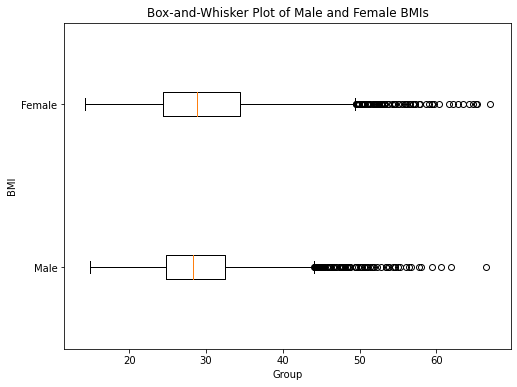

In [9]:
# Creating the boxplot for the male and female BMIs
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([male_bmi, female_bmi], vert=False, labels=['Male', 'Female'])
ax.set_xlabel('Group')
ax.set_ylabel('BMI')
ax.set_title('Box-and-Whisker Plot of Male and Female BMIs')

# Show the plot
plt.show()

From the box plot observations both data consist of many outliers, both plots defines female have average BMI of 28 and Male also has average BMI of 28.

In [10]:
# Compute the basic numerical aggregates
male_mean = np.mean(male_bmi)
male_std = np.std(male_bmi)
male_median = np.median(male_bmi)
male_iqr = np.percentile(male_bmi, 75) - np.percentile(male_bmi, 25)
male_min = np.min(male_bmi)
male_max = np.max(male_bmi)
male_skew = stats.skew(male_bmi)

female_mean = np.mean(female_bmi)
female_std = np.std(female_bmi)
female_median = np.median(female_bmi)
female_iqr = np.percentile(female_bmi, 75) - np.percentile(female_bmi, 25)
female_min = np.min(female_bmi)
female_max = np.max(female_bmi)
female_skew = stats.skew(female_bmi)

# Print the results in a readable format
print("""
            female  male
 BMI mean   {:.2f}  {:.2f}
 median     {:.2f}  {:.2f}
 min        {:.2f}  {:.2f}
 max        {:.2f}  {:.2f}
 std        {:.2f}  {:.2f}
 IQR        {:.2f}  {:.2f}
 skew       {:.2f}  {:.2f}
""".format(female_mean, male_mean, female_median, male_median, female_min, male_min, female_max, male_max, female_std, male_std, female_iqr, male_iqr, female_skew, male_skew))


            female  male
 BMI mean   30.10  29.14
 median     28.89  28.27
 min        14.20  14.91
 max        67.04  66.50
 std        7.76  6.31
 IQR        10.01  7.73
 skew       0.92  0.97



## Observation

* From observation of both the plots and aggregate functions both has similar BMI mean and same median.
* From the boxplot, The Maximum value of both BMI and skewness defines the presence of outliers.
* From the IQR Female has high dispersion than Male.
* Skewness is similar on Male BMI and Female BMI.

In [11]:
# Visualizing using pairplot
def pairplot(X, labels, bins=21, alpha=0.1):
    """
    Draws a scatter plot matrix, given:
    * X - data matrix,
    * labels - list of column names
    """
    assert X.shape[1] == len(labels)

    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j: # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)


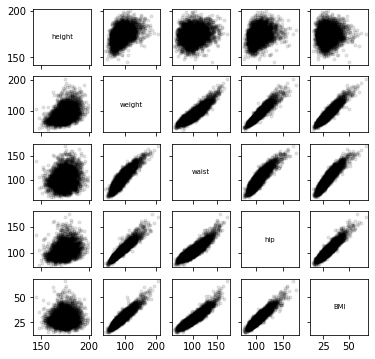

In [12]:
body_columns = columns = ["height", "weight", "waist", "hip", "BMI"]
which = male[:,[1,0,6,5,7]]
pairplot(which, body_columns)
plt.show()

From the pairplot it is observed from weight prespective as weight increases waist, hip, BMI also increases, but for height we cannot determine linear correlation as all datapoints are scattered all over.

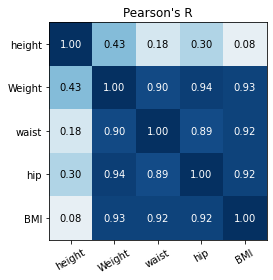

In [13]:
# Pearson Correlation
body_columns = np.array(["height", "Weight", "waist", "hip", "BMI"])

corr = np.corrcoef(which, rowvar=False)
plt.title("Pearson's R")
k = corr.shape[0]

plt.imshow(corr, cmap=plt.get_cmap("RdBu"), vmin=-1, vmax=1)

for i in range(k):
    for j in range(k):
        plt.text(i, j, f"{corr[i, j]:.2f}", ha="center", va="center", color="black" if np.abs(corr[i, j]) < 0.5 else "white")

plt.xticks(np.arange(k), labels=body_columns, rotation=30)
plt.yticks(np.arange(k), labels=body_columns)

plt.tick_params(axis="x", labelbottom=True)
plt.tick_params(axis="y", labelleft=True)

plt.grid(False)
plt.show()


From observation of Pearson correlation heatmap apart from height all features are high in positively correlated.
Height is very low in correlation on BMI has around 0.08.

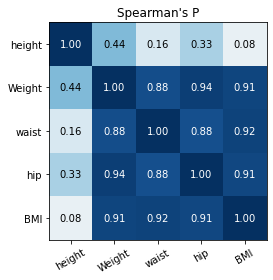

In [14]:
# Calculate Spearman correlation coefficients
corr_spearman, _ = spearmanr(which, axis=0)

plt.title("Spearman's P")
k = corr_spearman.shape[0]

plt.imshow(corr_spearman, cmap=plt.get_cmap("RdBu"), vmin=-1, vmax=1)

for i in range(k):
    for j in range(k):
        plt.text(i, j, f"{corr_spearman[i, j]:.2f}", ha="center", va="center", color="black" if np.abs(corr_spearman[i, j]) < 0.5 else "white")

plt.xticks(np.arange(k), labels=body_columns, rotation=30)
plt.yticks(np.arange(k), labels=body_columns)

plt.tick_params(axis="x", labelbottom=True)
plt.tick_params(axis="y", labelleft=True)

plt.grid(False)
plt.show()

From the Observation of Spearman Correlation Height has very low correlation on BMI, all features are positively correlated.

# Conclusion

From The Observation of Pairplot and Pearson, Spearman correlation we conclude that,
 
* Height is difficult to determine the linear correlation on all features, except for other features with height it is slightly positive correlated but the datapoints are scattered all around.

* From Both pearson and spearman correlation both has similar results on heatmap. For ex: Height is very low on BMI. Other features are high in positive correlation.


## REFERENCES

1) Gagolewski, M. (2022). Minimalist Data Wrangling with Python.datawranglingpy.gagolewski.com. Marek Gagolewski. Available at: https://datawranglingpy.gagolewski.com/.